In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np 
import pandas as pd 


train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
pd.pivot_table(train,index="Survived",values = ["Age", "SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [5]:
print(pd.pivot_table(train,index="Survived", columns = "Pclass", values ="Ticket", aggfunc = "count"))
print(pd.pivot_table(train,index="Survived", columns = "Sex", values ="Ticket", aggfunc = "count"))
print(pd.pivot_table(train,index="Survived", columns = "Embarked", values ="Ticket", aggfunc = "count"))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# setting seaborn default for plots
sns.set()

In [7]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

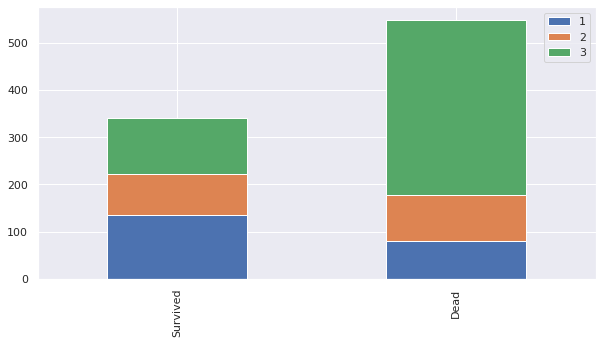

In [8]:
bar_chart('Pclass')

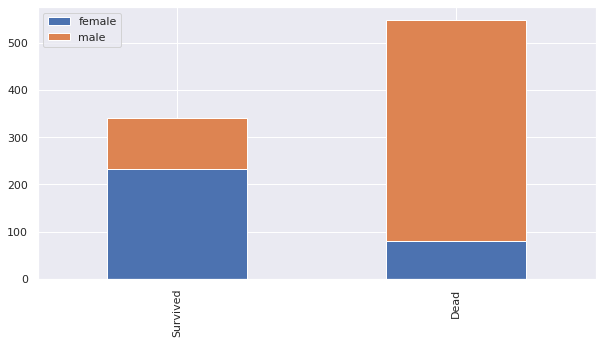

In [9]:
bar_chart('Sex')

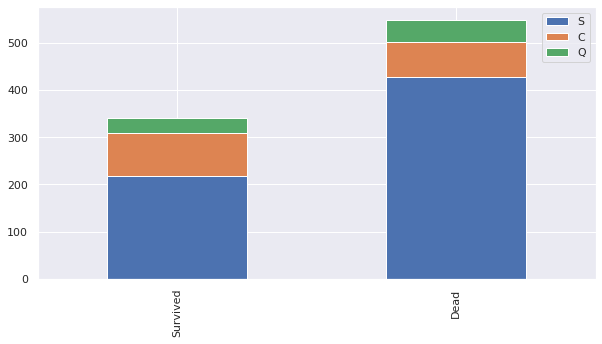

In [10]:
bar_chart('Embarked')

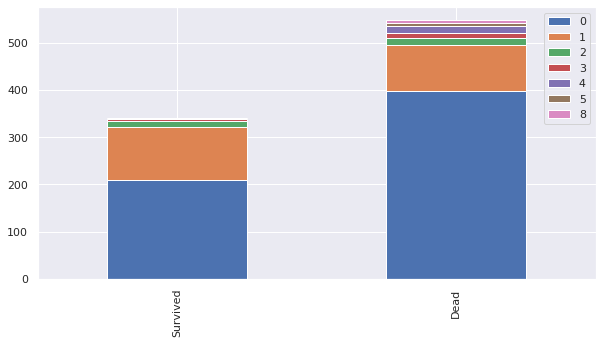

In [11]:
bar_chart('SibSp')

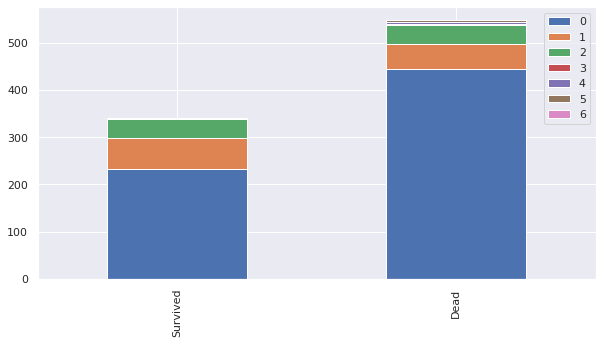

In [12]:
bar_chart('Parch')

In [13]:
comb_data = [train, test] #combining train and test dataset

for dataset in comb_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [14]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Ms            1
Lady          1
Don           1
Sir           1
Countess      1
Mme           1
Capt          1
Name: Title, dtype: int64

In [15]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [18]:
### Now let's map new values express those titles and check if this will help us in our analysis 

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in comb_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)


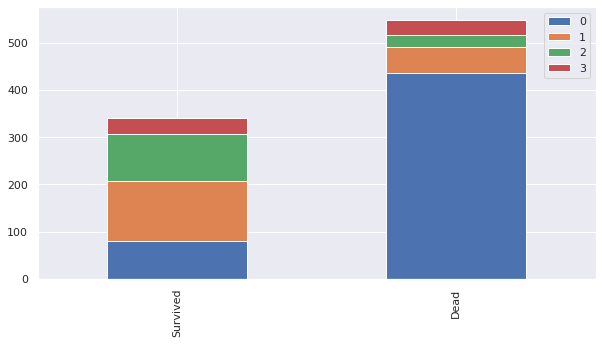

In [19]:
bar_chart('Title')

In [20]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)


In [22]:
#sex mapping for feature engineering 

sex_mapping = {"male": 0, "female": 1}

for dataset in comb_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

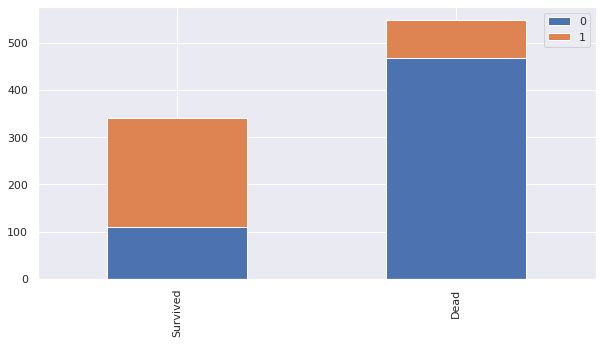

In [23]:
bar_chart('Sex')

In [24]:
train.dropna(subset=['Embarked'],inplace = True)
test.dropna(subset=['Embarked'],inplace = True)

train["Age"].fillna(train.groupby("Title")["Age"].transform("mean"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("mean"), inplace=True)

In [25]:
for dataset in comb_data:
    dataset.loc[ dataset['Age'] <= 16 , 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

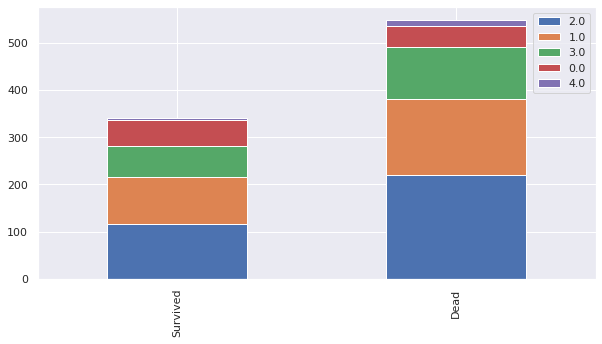

In [26]:
bar_chart('Age')

<AxesSubplot:>

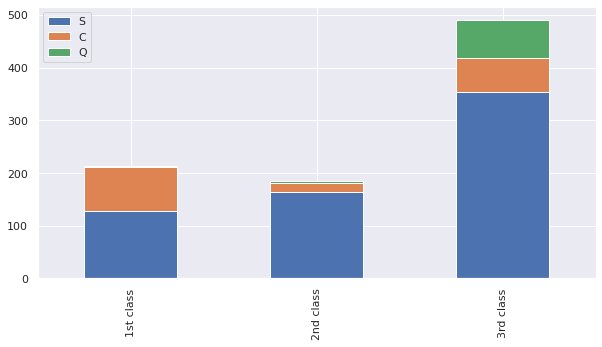

In [27]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [28]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in comb_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)


In [29]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("mean"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("mean"), inplace=True)

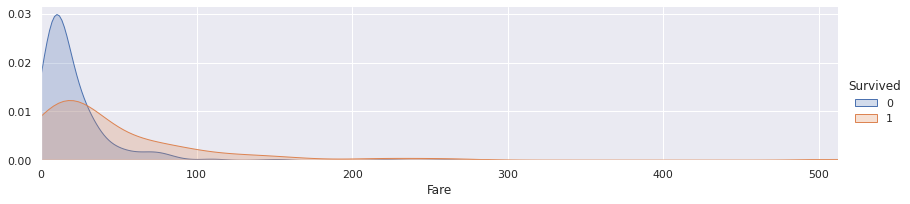

In [30]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.show()

In [31]:
for dataset in comb_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [32]:
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
E101           3
D              3
              ..
B30            1
A7             1
C30            1
D10 D12        1
E46            1
Name: Cabin, Length: 146, dtype: int64

<AxesSubplot:>

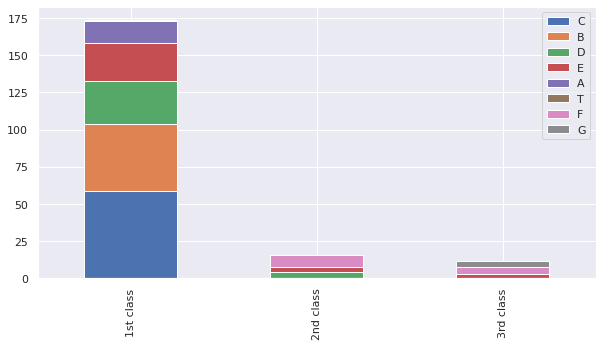

In [33]:
for dataset in comb_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [35]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in comb_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

# fill missing Cabin with mean for each Pclass

train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("mean"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("mean"), inplace=True)

train["Parch_n"] = train["SibSp"] + train["Parch"] + 1
test["Parch_n"] = test["SibSp"] + test["Parch"] + 1


(0.0, 11.0)

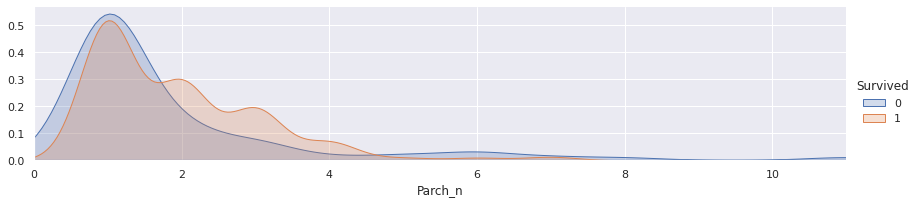

In [36]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Parch_n',shade= True)
facet.set(xlim=(0, train['Parch_n'].max()))
facet.add_legend()
plt.xlim(0)

In [37]:
f_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in comb_data:
    dataset['Parch_n'] = dataset['Parch_n'].map(f_mapping)

In [38]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)


In [39]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((889, 8), (889,))

In [40]:
train_data.describe().columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Title',
       'Parch_n'],
      dtype='object')

# **Our Classifiers**

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


In [42]:
#Logistic Regression
reg = LogisticRegression(max_iter = 2000)
scoring = 'accuracy'
score = cross_val_score(reg, train_data, target, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.8258427  0.81460674 0.80898876 0.81460674 0.83050847]


81.89

In [43]:
#kfold-validation

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [44]:
#KNN

kNN = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score_1 = cross_val_score(kNN, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score_1)
round(np.mean(score_1)*100, 2)

[0.73033708 0.74157303 0.84269663 0.76404494 0.88764045 0.83146067
 0.86516854 0.79775281 0.83146067 0.92045455]


82.13

In [45]:
#Decison Tree

DTC = DecisionTreeClassifier()
scoring = 'accuracy'
score_2 = cross_val_score(DTC, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score_2)
round(np.mean(score_2)*100, 2)

[0.76404494 0.76404494 0.78651685 0.75280899 0.84269663 0.78651685
 0.83146067 0.73033708 0.78651685 0.88636364]


79.31

In [48]:
#Random Forest

RFC = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score_3 = cross_val_score(RFC, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score_3)
round(np.mean(score_3)*100, 2)

[0.79775281 0.78651685 0.86516854 0.75280899 0.86516854 0.84269663
 0.86516854 0.73033708 0.82022472 0.88636364]


82.12

In [49]:
#Naive Bayes

GNB = GaussianNB()
scoring = 'accuracy'
score_4 = cross_val_score(GNB, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score_4)
round(np.mean(score_4)*100, 2)

[0.65168539 0.76404494 0.80898876 0.7752809  0.80898876 0.82022472
 0.80898876 0.74157303 0.74157303 0.86363636]


77.85

In [50]:
#Support Vector Machine

SVC = SVC()
scoring = 'accuracy'
score_5 = cross_val_score(SVC, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score_5)
round(np.mean(score_5)*100,2)


[0.75280899 0.76404494 0.88764045 0.78651685 0.8988764  0.83146067
 0.8988764  0.79775281 0.80898876 0.90909091]


83.36

In [52]:
#Support Vector gives the highest accuracy rate, hence na wetion we go use be that


SVC.fit(train_data, target)
test_data = test.drop("PassengerId", axis=1).copy()
prediction = SVC.predict(test_data)

In [54]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('titanic_submission.csv', index=False)
submission = pd.read_csv('titanic_submission.csv')

In [56]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(submission)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [57]:
submission.shape

(418, 2)